# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format ='retina'
sns.set_palette("pastel")

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

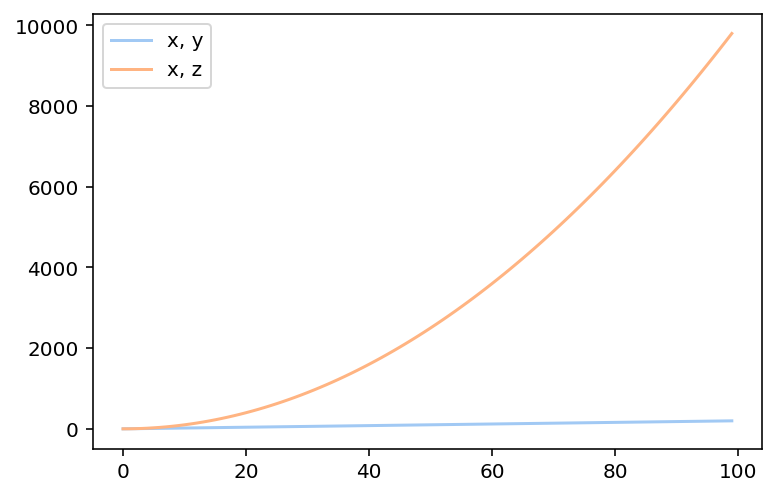

In [3]:
plt.plot(x, y, label = 'x, y')
plt.plot(x, z, label = 'x, z')
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

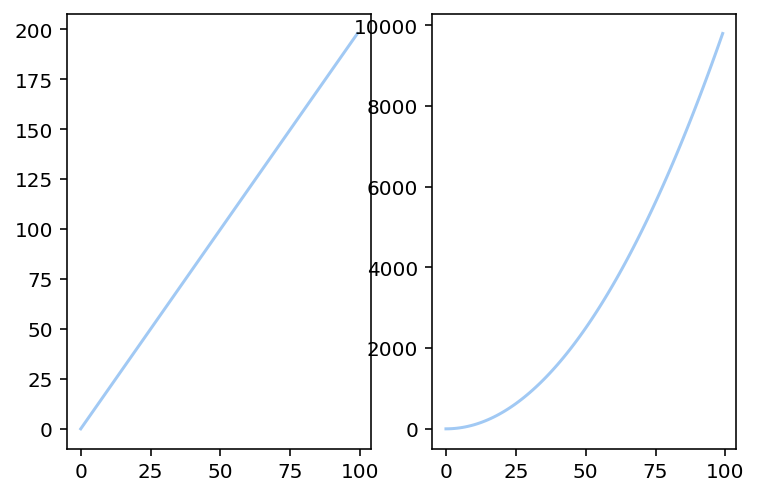

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(x, y)
axs[1].plot(x, z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

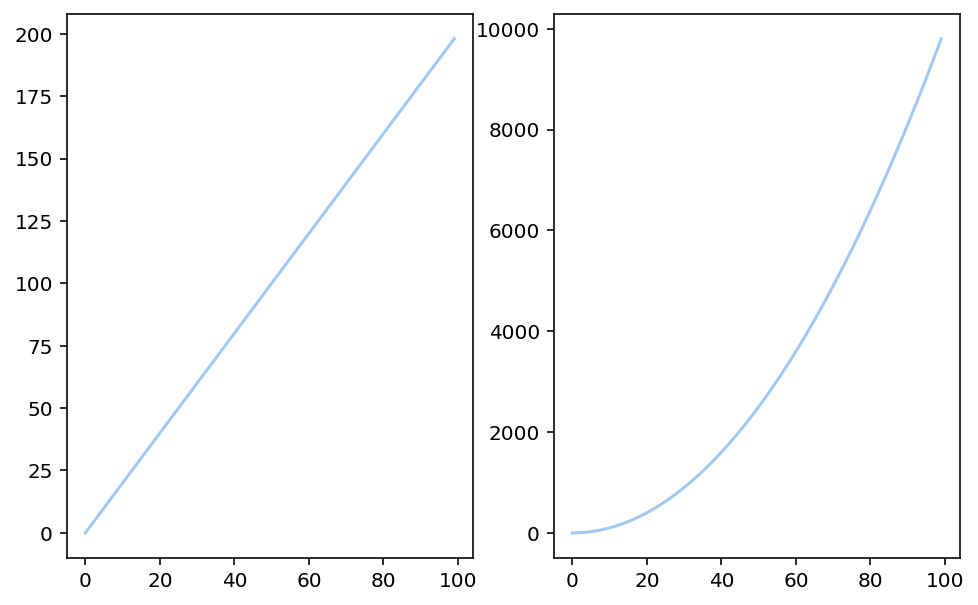

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,5))

axs[0].plot(x, y)
axs[1].plot(x, z)

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

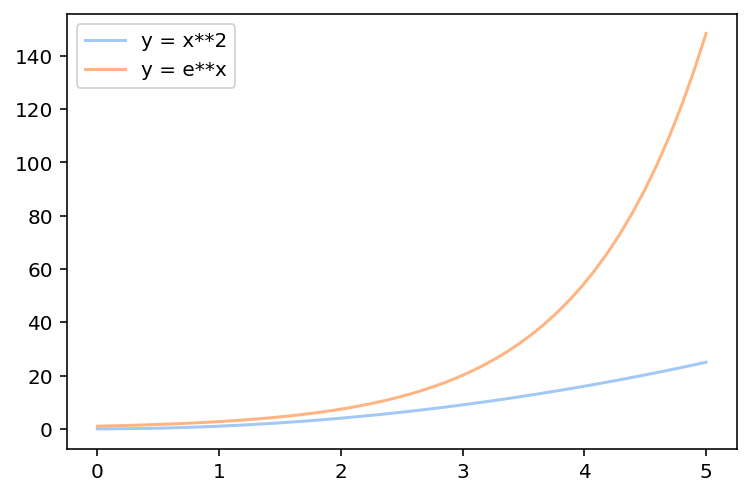

In [6]:
x = np.linspace(0, 5, 50)
y = x ** 2
yy = np.exp(x)

plt.plot(x, y, label = 'y = x**2')
plt.plot(x, yy, label = 'y = e**x')
plt.legend()

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

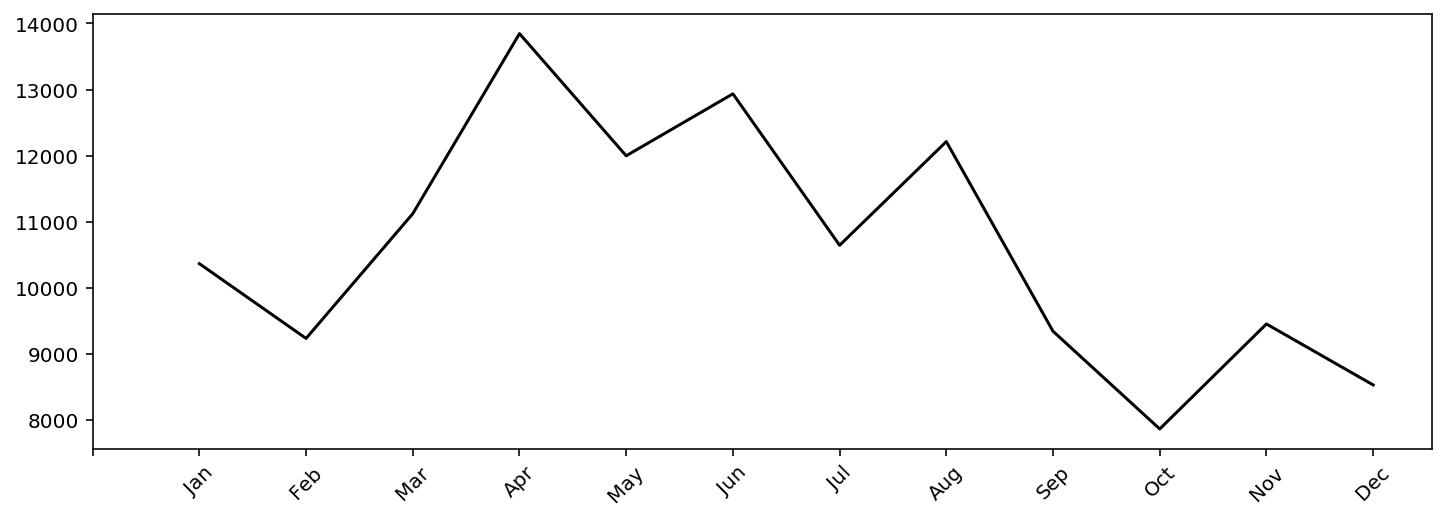

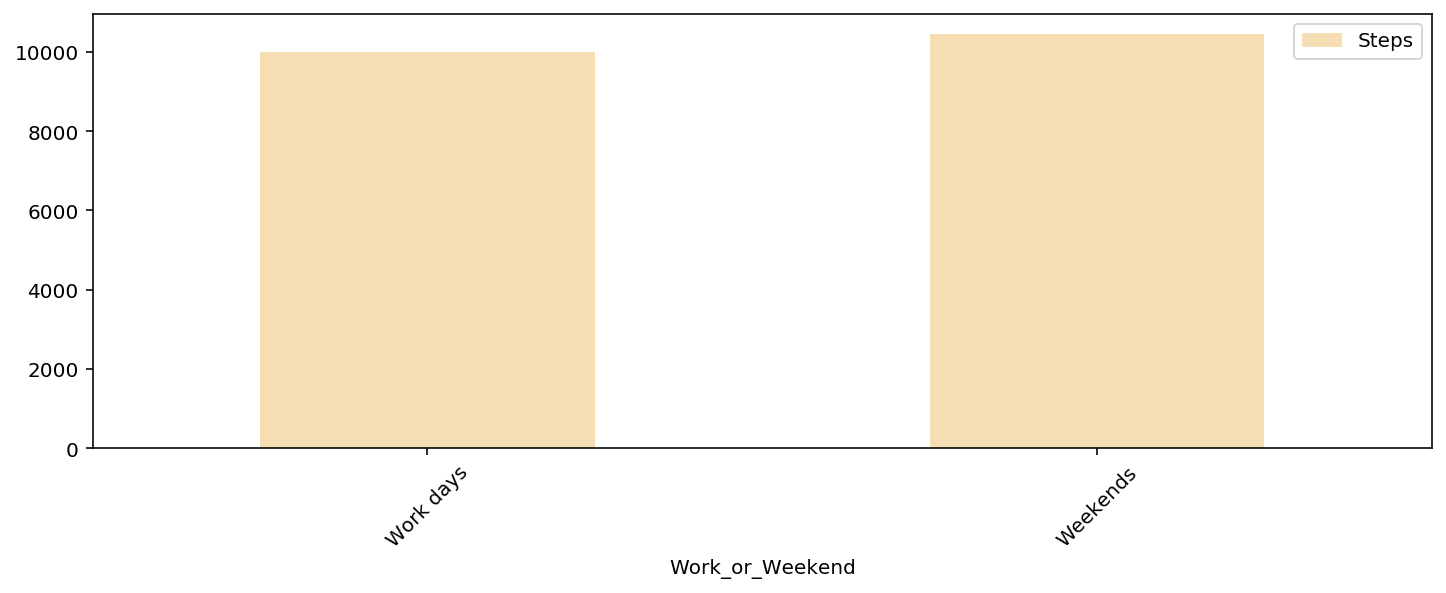

In [8]:
# MEDIAN STEPS BY MONTH_ENCODED
median_months = fitbit.groupby(by = 'Months_encoded').median()
plt.figure(figsize=(12,4))

fig1 = plt.plot(median_months['Steps'], color = 'black')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 45)
plt.show(fig1)

# MEDIAN STEPS BY WORK_OR_WEEKEND
median_work_weekends = fitbit[["Work_or_Weekend", "Steps"]].groupby(["Work_or_Weekend"]).agg("median")

fig2 = median_work_weekends.plot.bar(figsize=(12,4),  color = 'wheat')
plt.xticks([0, 1], ['Work days', 'Weekends'], rotation = 45)
plt.show(fig2)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

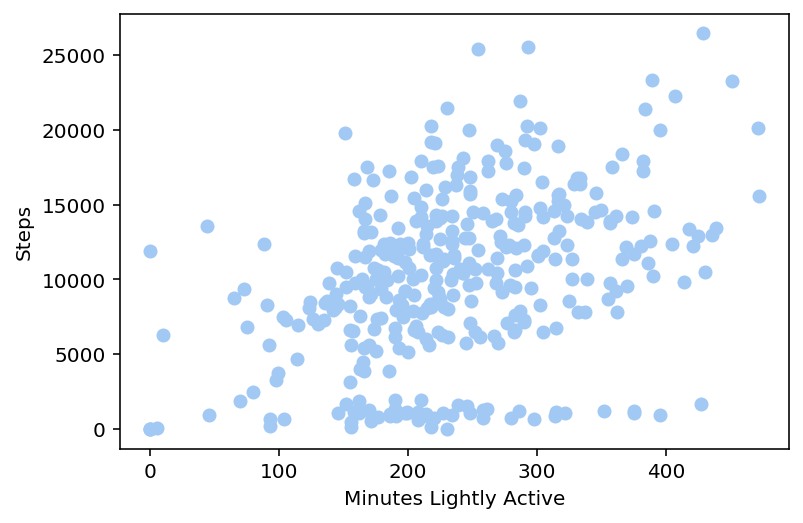

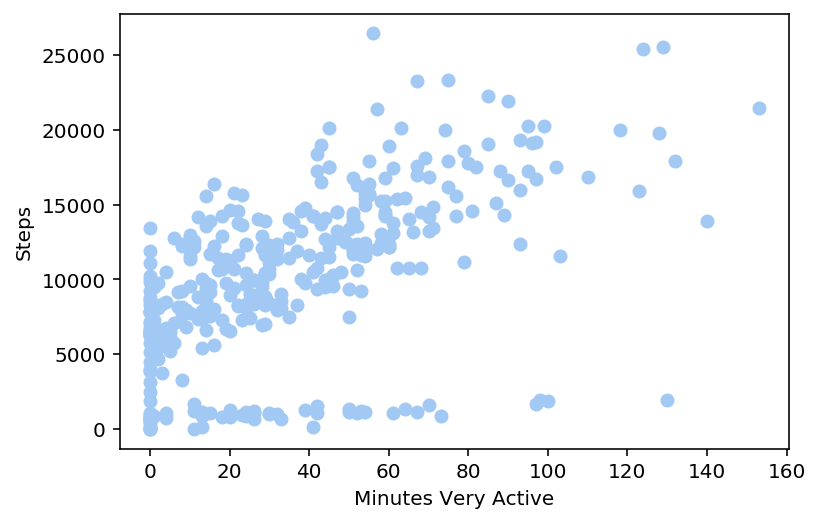

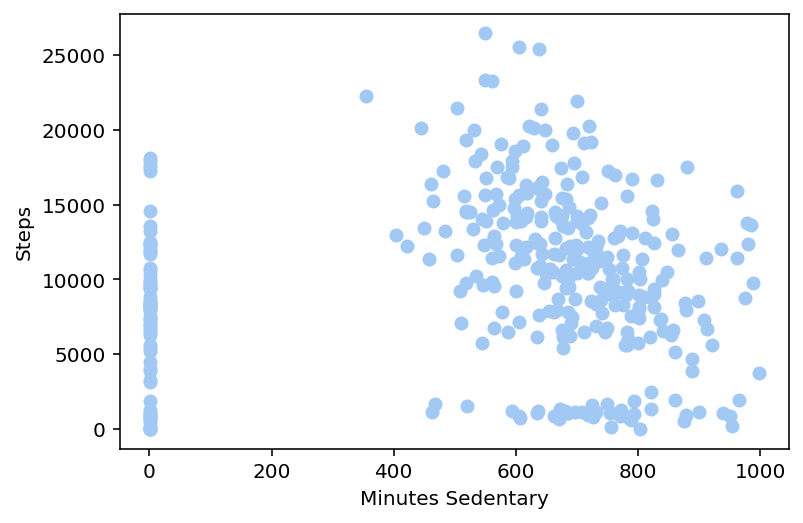

In [9]:
variables = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for fig in variables:
    plt.figure()
    plt.scatter(fitbit[fig], fitbit['Steps'])
    plt.xlabel(fig)
    plt.ylabel('Steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [11]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES
num_var = titanic.select_dtypes(include = 'number')
num_var.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [13]:
# CATEGORICAL VARIABLES
cat_var = titanic.select_dtypes(include = 'object')
cat_var

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [14]:
import matplotlib.style
import matplotlib as mpl

mpl.style.use('classic')
plt.figure(figsize = (12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

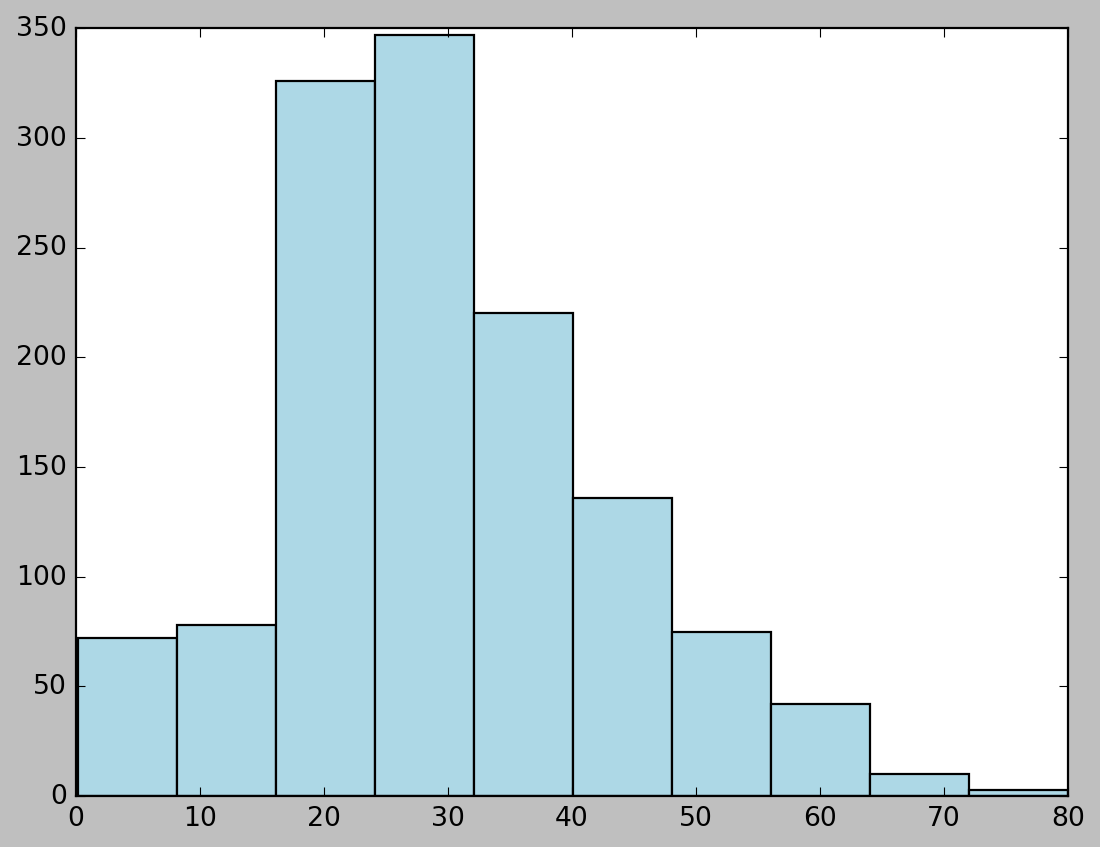

In [15]:
plt.hist(titanic['Age'], color = 'lightblue')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

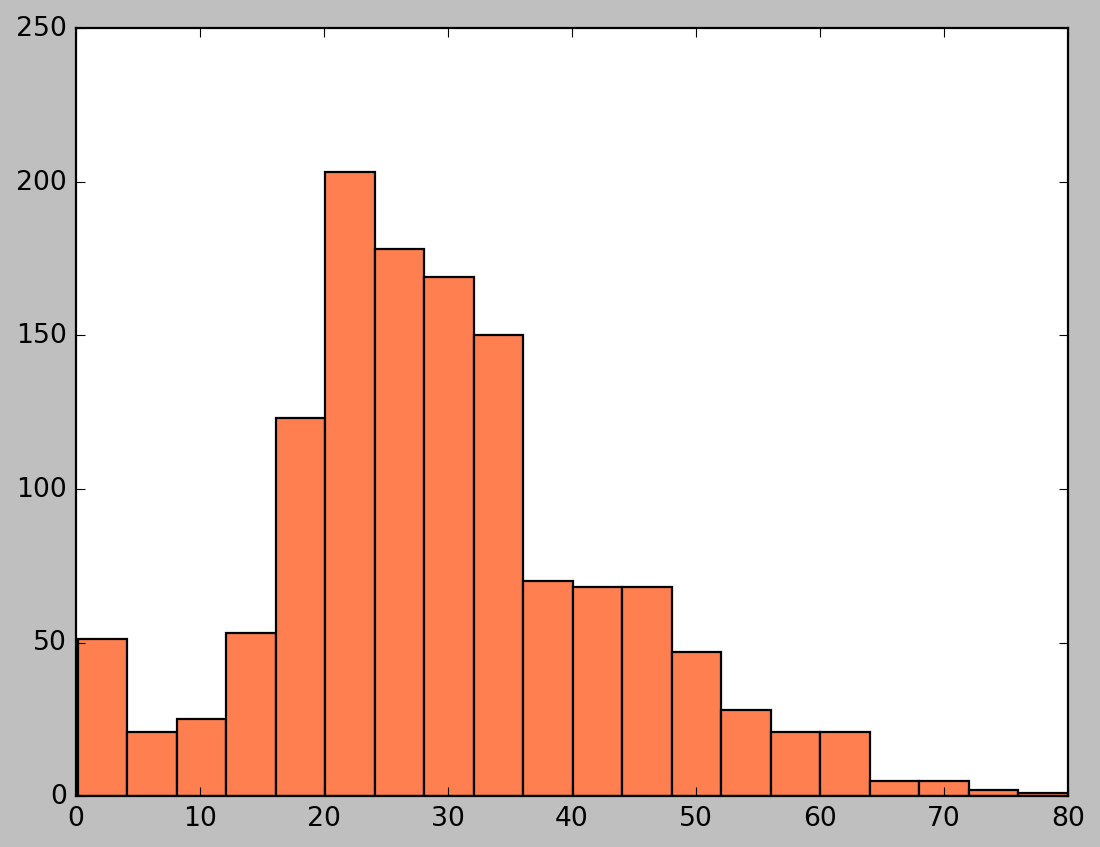

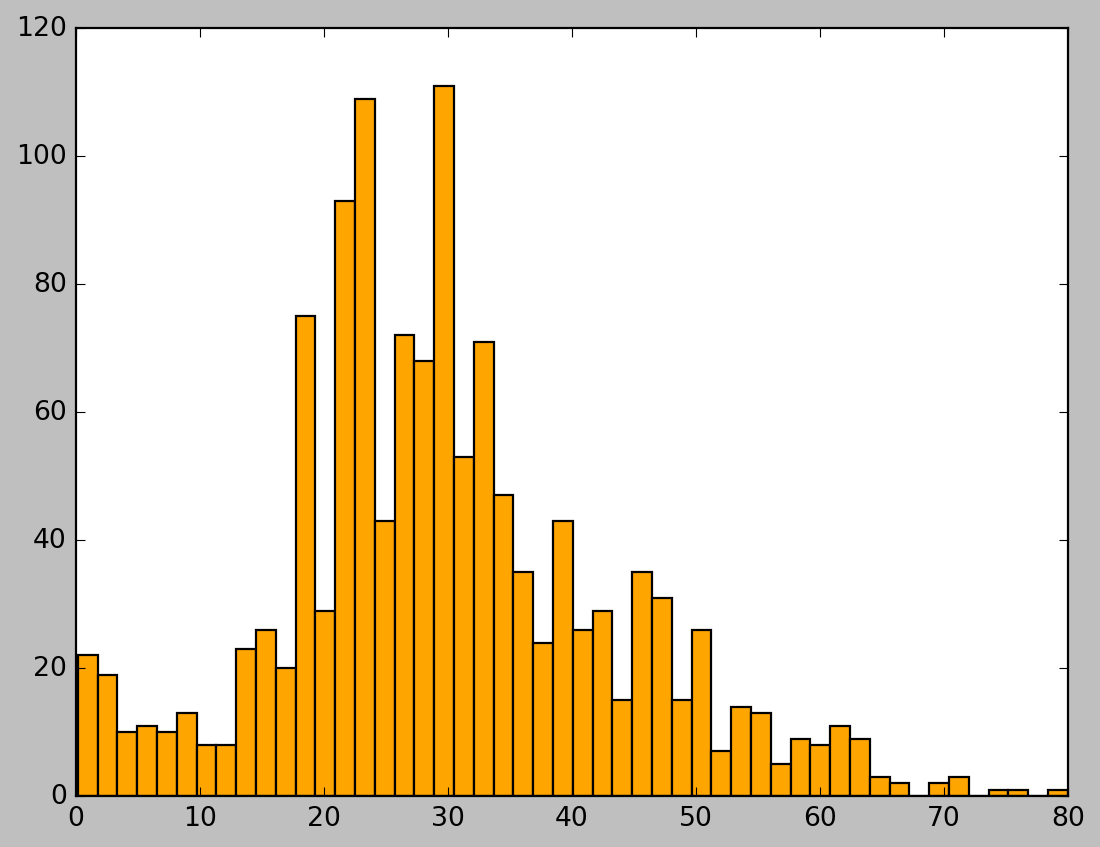

In [16]:
# 20 bins
plt.hist(titanic['Age'], bins = 20, color = 'coral')
plt.show()

# 50 bins
plt.hist(titanic['Age'], bins = 50, color = 'orange')
plt.show()

#### How does the bin size affect your plot?

In [17]:
"""
the more bins the more detailled information
"""

'\nthe more bins the more detailled information\n'

#### Use seaborn to show the distribution of column `Age`.

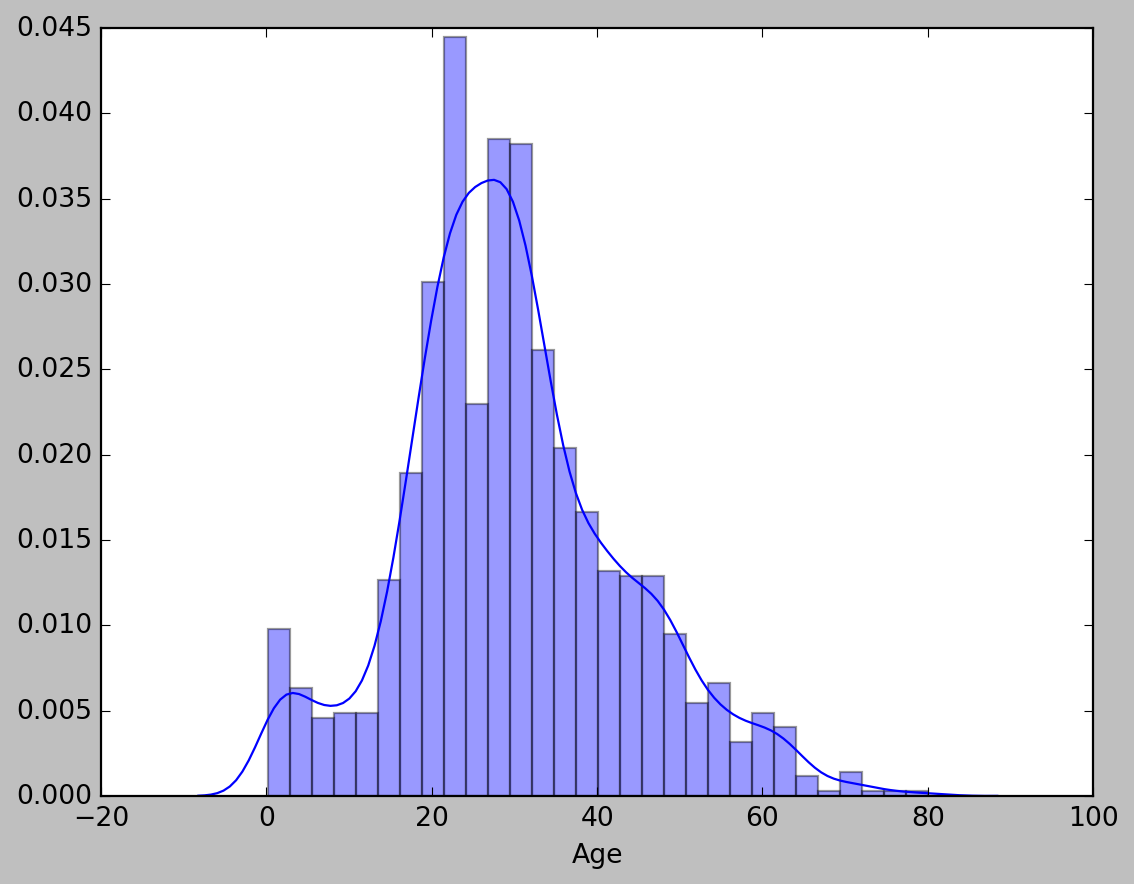

In [18]:
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

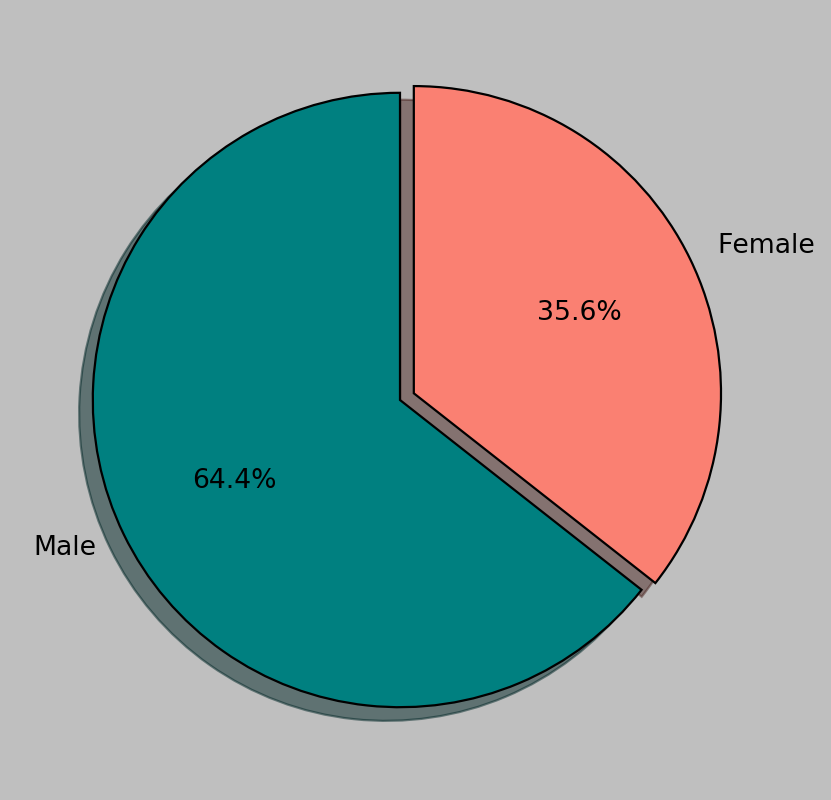

In [19]:
# Method 1 - matplotlib
gender_count = titanic['Gender'].value_counts()
label = ['Male', 'Female']

plt.pie(gender_count, explode = (0, 0.05), labels = label, colors = ['teal', 'salmon'] ,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

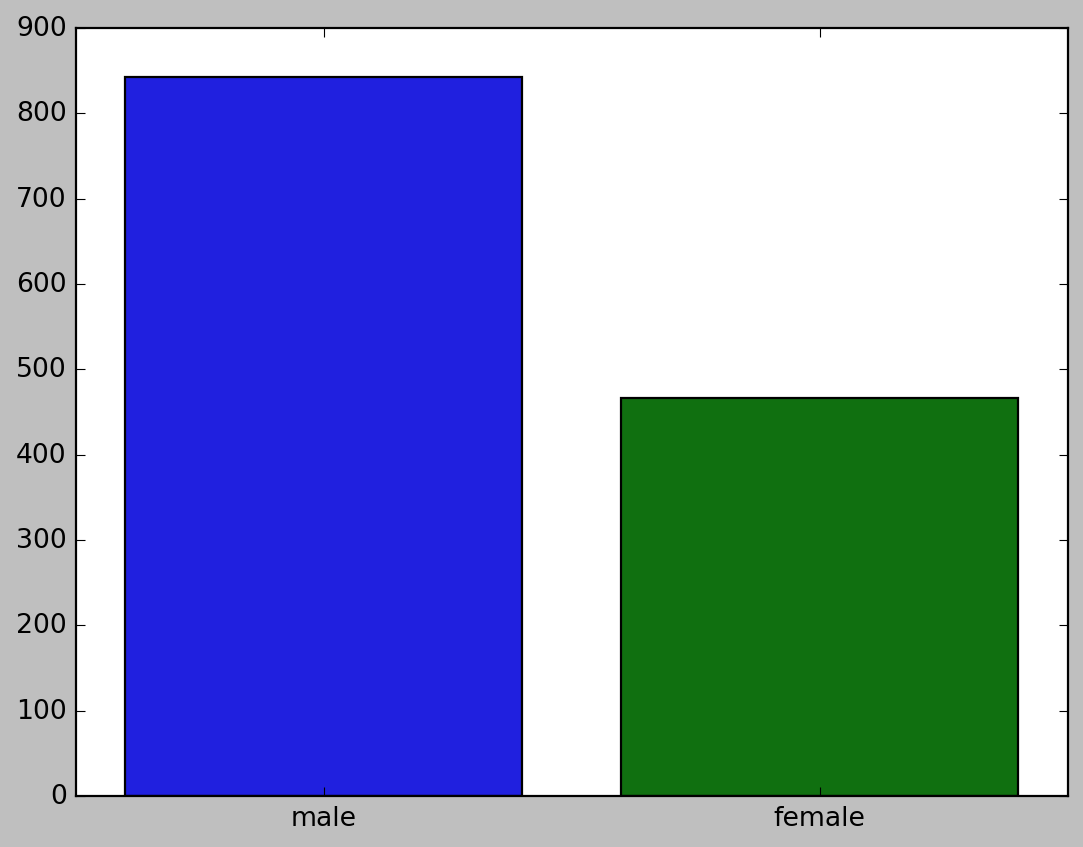

In [20]:
# Method 2 - seaborn
sns.barplot(gender_count.index, gender_count.values)

#### Use the right plot to visualize the column `Pclass`.

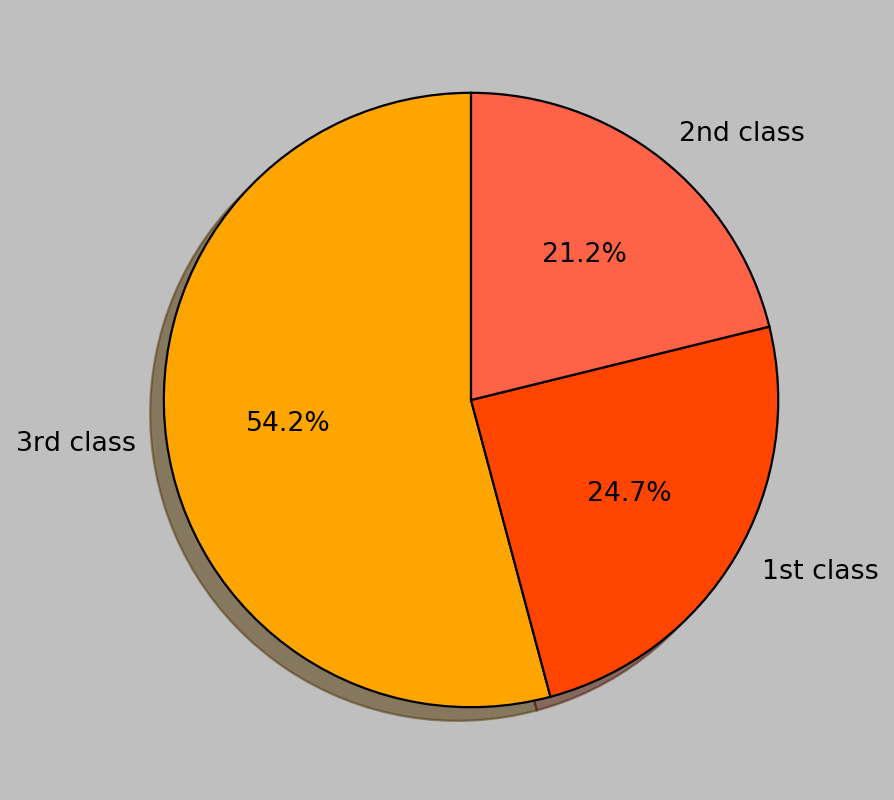

In [21]:
class_count = titanic['Pclass'].value_counts()
label = ['3rd class', '1st class', '2nd class']
plt.pie(class_count, labels=label, colors = ['orange', 'orangered', 'tomato'] ,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

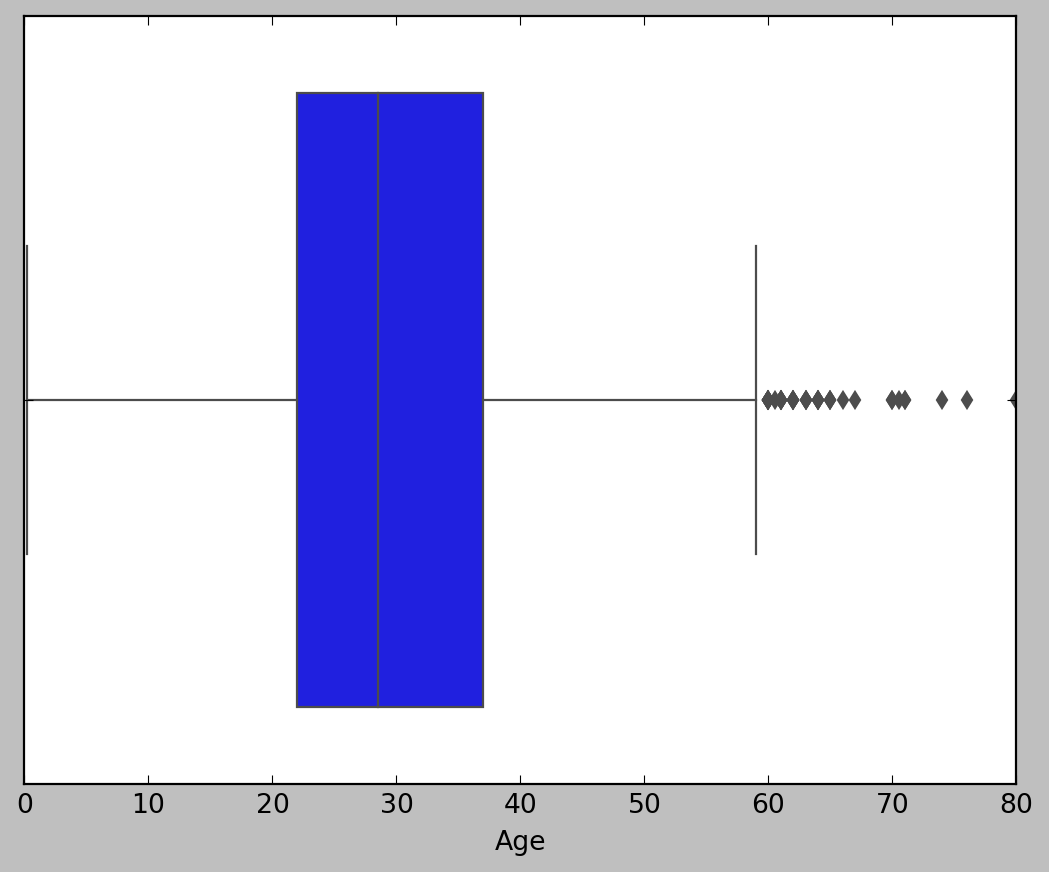

In [22]:
sns.boxplot(titanic['Age'])
plt.show()

In [23]:
"""
i choosed the box plot because it shows a description of the statistiques values for that column: 
mean, min, quatiles, max and outliers
"""

'\ni choosed the box plot because it shows a description of the statistiques values for that column: \nmean, min, quatiles, max and outliers\n'

#### What does the last plot tell you about the feature `Age`?

In [24]:
"""
The mean is just under 30 years old
All value above 60 years old is considered an outlier
Which can look surprising but it not really considering that the titanic sank in 1912 when the life 
expectancy was around 50 years old.
"""

'\nThe mean is just under 30 years old\nAll value above 60 years old is considered an outlier\nWhich can look surprising but it not really considering that the titanic sank in 1912 when the life \nexpectancy was around 50 years old.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

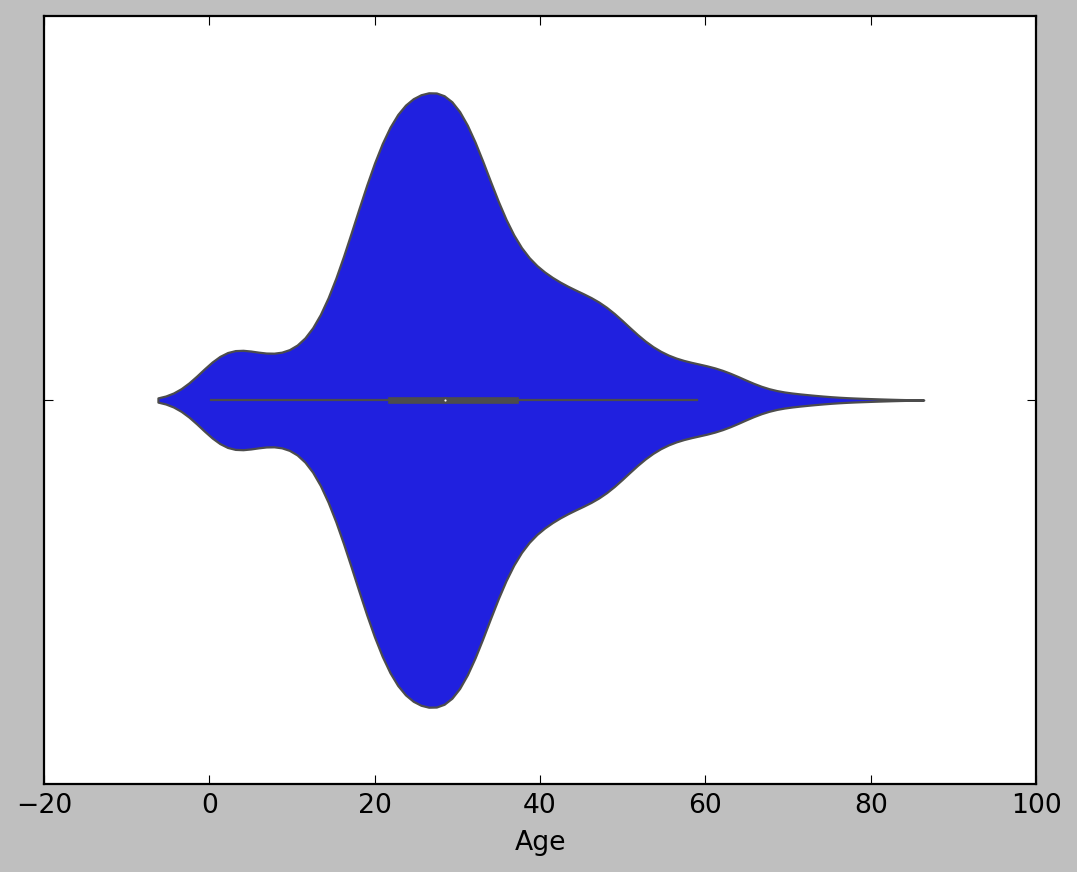

In [25]:
sns.violinplot(titanic['Age'])
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [26]:
"""
provide more detailled information on the way the data is spread out
"""

'\nprovide more detailled information on the way the data is spread out\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

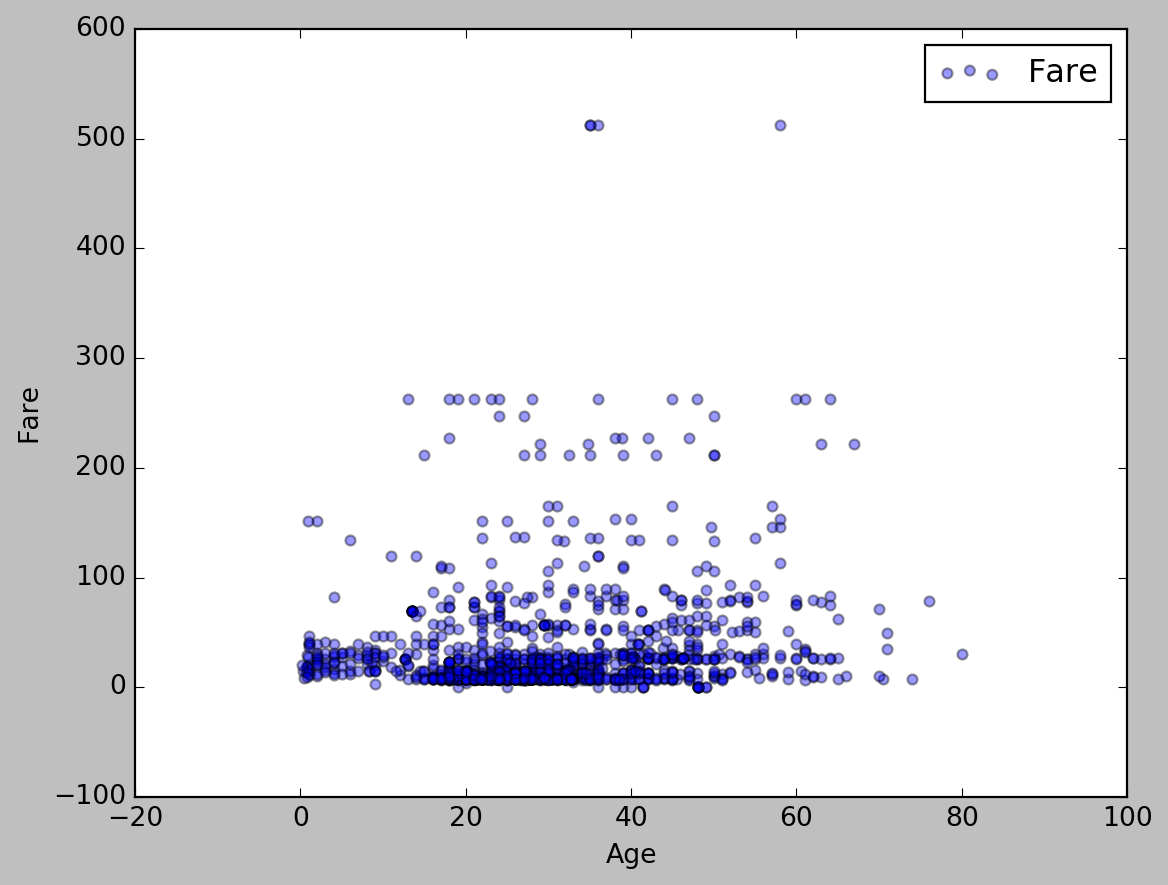

In [27]:
# Method 1 - matplotlib
plt.scatter(x = 'Age', y = 'Fare', data = titanic, alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

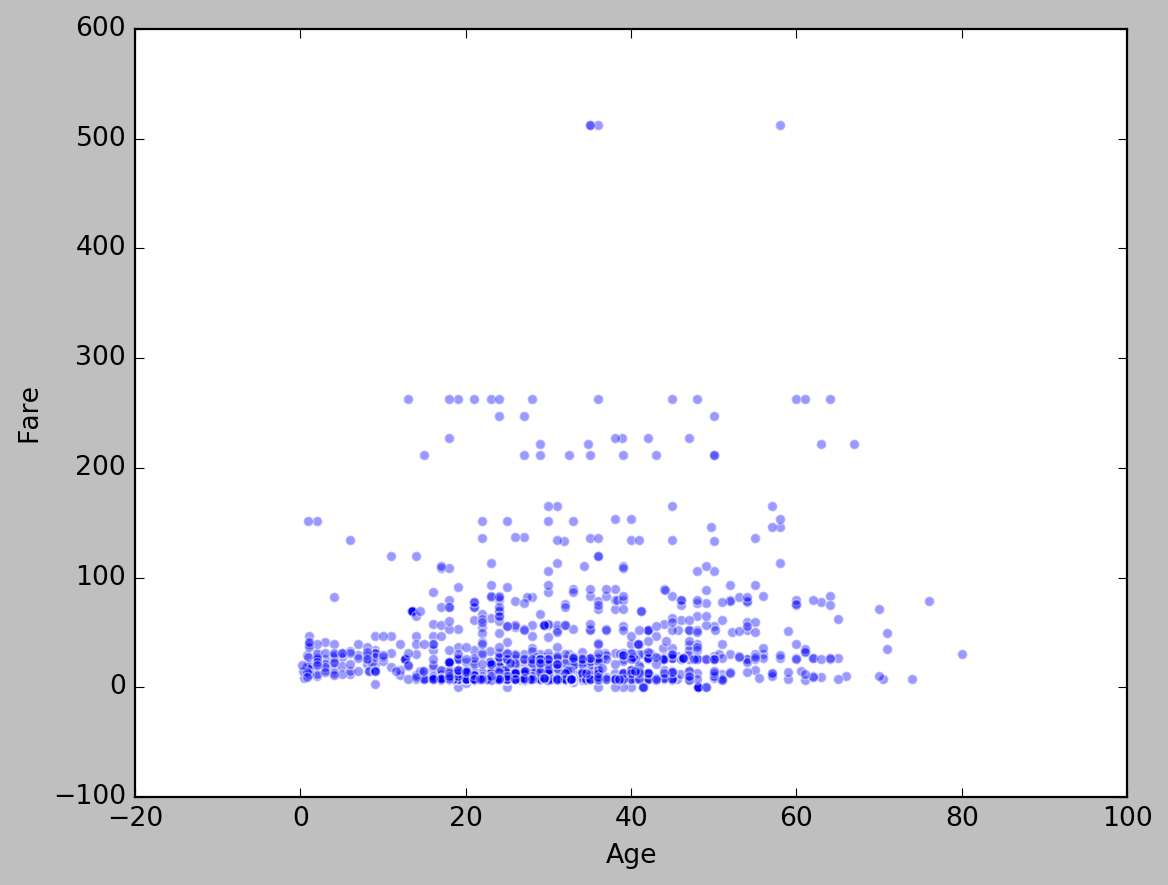

In [28]:
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic, alpha = 0.4)
plt.show()

#### Plot the correlation matrix using seaborn.

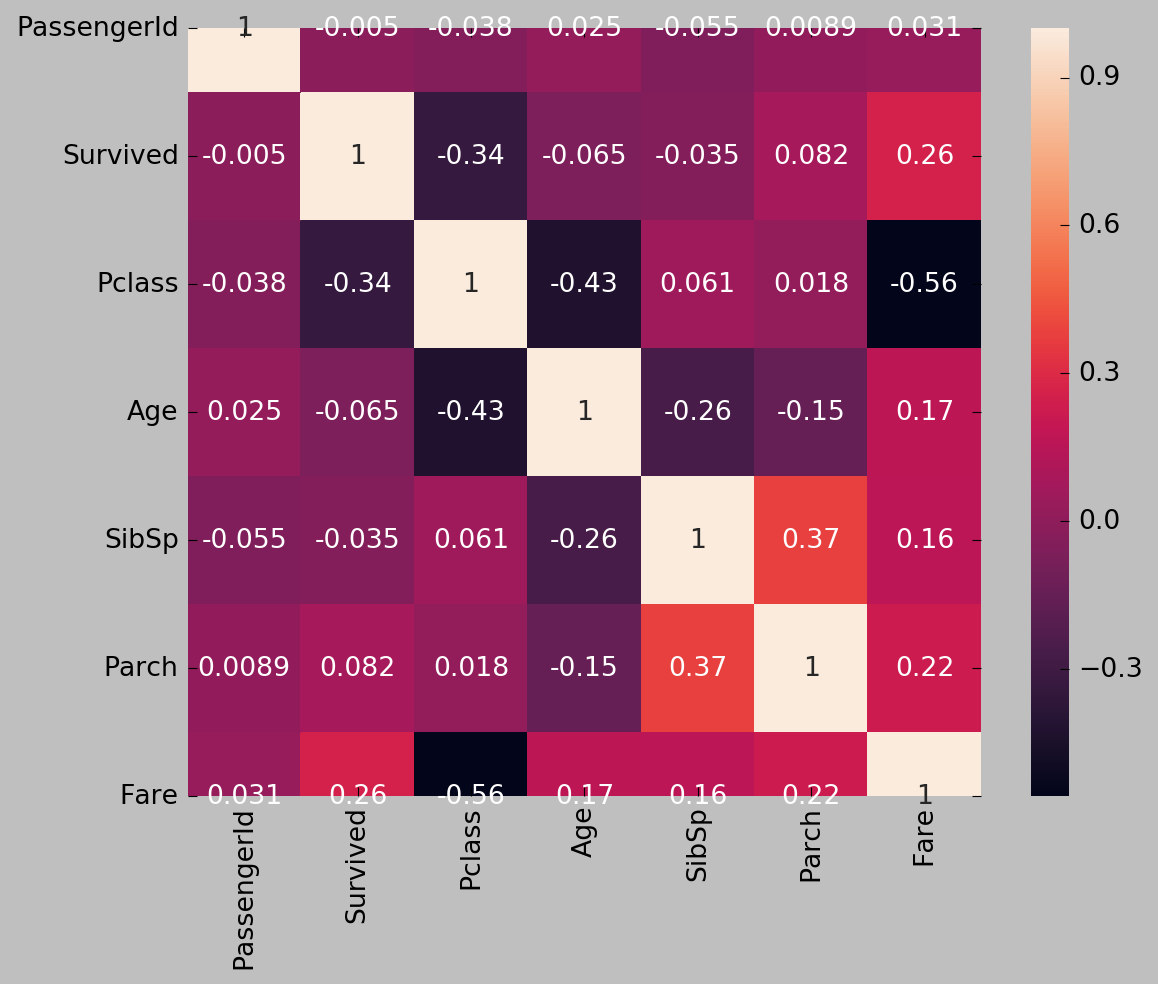

In [29]:
corr_titanic = titanic.corr()
sns.heatmap(corr_titanic, annot = True)

#### What are the most correlated features?

In [30]:
"""
The most correlated features are SibSp	Parch
"""

'\nThe most correlated features are SibSp\tParch\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

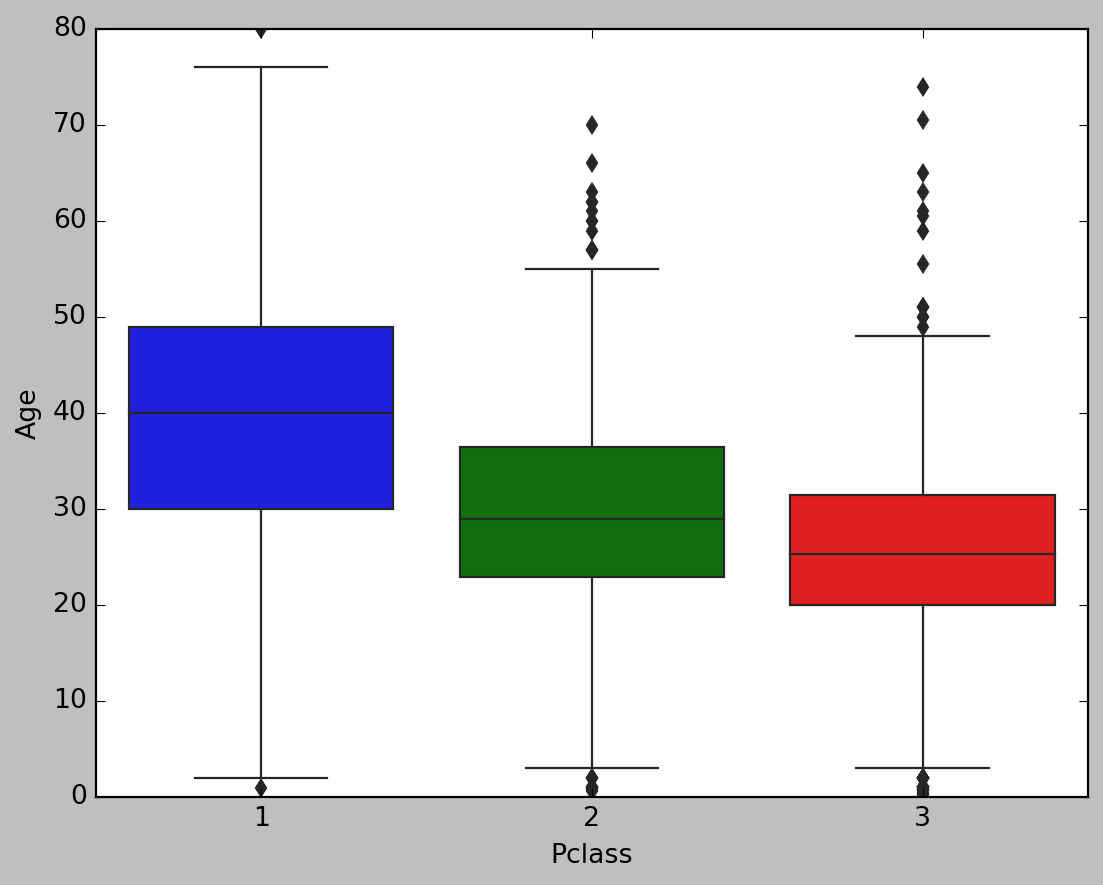

In [31]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

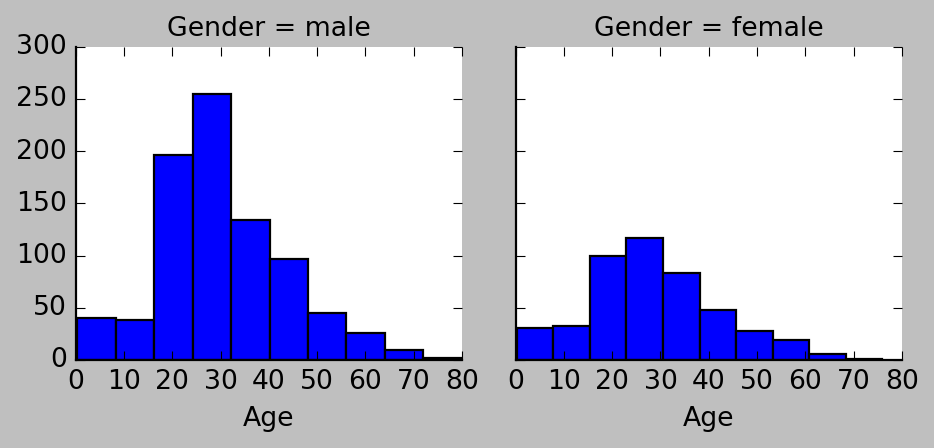

In [32]:
fig = sns.FacetGrid(titanic, col = "Gender")
fig.map(plt.hist, 'Age')